### CASA0002 Urban Simulation Assessment notebook

In [232]:
import pandas as pd
London_flows = pd.read_csv("London_flows.csv") 
London_flows.head()



,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167


# Part 1: London's underground resilience

## I. Topological network

### I.1 Centrality measures:

#### Initialization of London flow gragh object

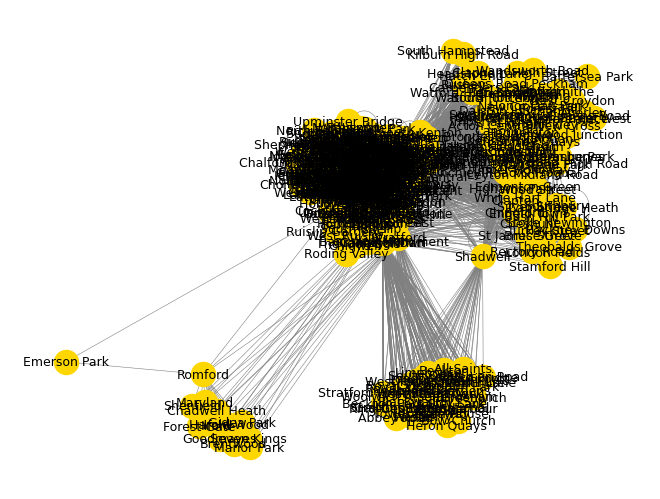

In [233]:
import networkx as nx
import matplotlib.pyplot as plt

g_flows = nx.from_pandas_edgelist(London_flows, 'station_origin', 'station_destination','flows')
G = nx.read_graphml('london.graphml')
# Plot graph
nx.draw(g_flows,
        with_labels = True,
        node_color='gold',
        font_size=9,
        font_color='black',
        edge_color='gray',
        width=0.4)

In [234]:
print(g_flows)

Graph with 399 nodes and 31718 edges


In [235]:
list(g_flows.edges(data = True))[0:10]

[('Abbey Road', 'Bank and Monument', {'flows': 0}),
 ('Abbey Road', 'Beckton', {'flows': 0}),
 ('Abbey Road', 'Blackwall', {'flows': 0}),
 ('Abbey Road', 'Canary Wharf', {'flows': 2}),
 ('Abbey Road', 'Canning Town', {'flows': 5}),
 ('Abbey Road', 'Crossharbour', {'flows': 0}),
 ('Abbey Road', 'Custom House', {'flows': 0}),
 ('Abbey Road', 'Cutty Sark', {'flows': 0}),
 ('Abbey Road', 'Cyprus', {'flows': 0}),
 ('Abbey Road', 'Devons Road', {'flows': 0})]

In [236]:
list(g_flows.nodes(data = True))[0:10]

[('Abbey Road', {}),
 ('Bank and Monument', {}),
 ('Beckton', {}),
 ('Blackwall', {}),
 ('Canary Wharf', {}),
 ('Canning Town', {}),
 ('Crossharbour', {}),
 ('Custom House', {}),
 ('Cutty Sark', {}),
 ('Cyprus', {})]

#### Degree centrality

In [237]:
deg_flow=nx.degree(g_flows)

list(deg_flow)[0:10]

[('Abbey Road', 34),
 ('Bank and Monument', 305),
 ('Beckton', 43),
 ('Blackwall', 40),
 ('Canary Wharf', 307),
 ('Canning Town', 304),
 ('Crossharbour', 42),
 ('Custom House', 44),
 ('Cutty Sark', 44),
 ('Cyprus', 42)]

In [238]:
degrees = dict(deg_flow)
sorted_nodes = sorted(degrees, key = degrees.get, reverse=True)
list(sorted_nodes)[0:10]

['Stratford',
 'Highbury & Islington',
 'Whitechapel',
 'West Brompton',
 'Canary Wharf',
 'Canada Water',
 'Liverpool Street',
 'Bank and Monument',
 'Richmond',
 'Canning Town']

In [239]:
nx.set_node_attributes(g_flows,dict(deg_flow),'degree')

# To check nodes attributes
list(g_flows.nodes(data=True))[0:10]

[('Abbey Road', {'degree': 34}),
 ('Bank and Monument', {'degree': 305}),
 ('Beckton', {'degree': 43}),
 ('Blackwall', {'degree': 40}),
 ('Canary Wharf', {'degree': 307}),
 ('Canning Town', {'degree': 304}),
 ('Crossharbour', {'degree': 42}),
 ('Custom House', {'degree': 44}),
 ('Cutty Sark', {'degree': 44}),
 ('Cyprus', {'degree': 42})]

In [240]:
# deg_color=[(node['degree']) for i, node in g_flows.nodes(data=True)]

# print(deg_color)

In [241]:
# deg_size=[(float(node['degree'])/max(deg_color)*1000) for i, node in g_flows.nodes(data=True)]

# print(deg_size)

In [242]:
# fig, ax = plt.subplots(figsize=(10,12))

# pos=nx.spring_layout(g_flows)
# nx.draw_networkx_labels(g_flows, pos,font_size=9,
#         font_color='black')
# nx.draw_networkx_edges(g_flows, pos,edge_color='gray', 
#         width=0.4)
# nod=nx.draw_networkx_nodes(g_flows,
#         pos = pos,
#         node_color= deg_color,
#         node_size= deg_size)

# plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
# plt.axis("off")
# plt.title("flow network of London stations",fontsize=15)
# plt.show()

In [243]:
deg_flow_norm =nx.degree_centrality(g_flows)


nx.set_node_attributes(g_flows,dict(deg_flow_norm),'degree_norm')

norm_degrees = dict(deg_flow)
sorted_nodes_norm = sorted(norm_degrees, key = norm_degrees.get, reverse=True)
list(sorted_nodes_norm)[0:10]

# deg_color_norm=[(node['degree_norm']) for i, node in g_flows.nodes(data=True)]
# deg_size_norm=[(node['degree_norm']*1000) for i, node in g_flows.nodes(data=True)]


# fig, ax = plt.subplots(figsize=(10,12))


# pos=nx.spring_layout(g_flows)
# nx.draw_networkx_edges(g_flows, pos,edge_color='gray', 
#         width=0.4)
# nx.draw_networkx_labels(g_flows, pos,font_size=9,
#         font_color='black')
# nod=nx.draw_networkx_nodes(g_flows,
#         pos = pos,
#         node_color= deg_color_norm,
#         node_size= deg_size_norm)

# plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
# plt.axis("off")
# plt.title("Flow network network of London",fontsize=15)
# plt.show()

['Stratford',
 'Highbury & Islington',
 'Whitechapel',
 'West Brompton',
 'Canary Wharf',
 'Canada Water',
 'Liverpool Street',
 'Bank and Monument',
 'Richmond',
 'Canning Town']

#### Closeness centrslity

In [244]:
# v_flows={(e1, e2):round(1./weight,7) for e1, e2, weight in g_flows.edges(data='flows')}
# v_flows = {(e1, e2): round(1.0 / weight, 7) if weight != 0 else float('0') for e1, e2, weight in g_flows.edges(data='flows')}

# nx.set_edge_attributes(g_flows, v_flows, "v_flows")

# list(g_flows.edges(data = True))[0:10]

In [245]:
clos_flows=nx.closeness_centrality(g_flows, distance=('flows'))
nx.set_node_attributes(g_flows,clos_flows,'closeness')
dfff = pd.DataFrame.from_dict(clos_flows,columns=['closeness'],orient='index')
df_sor = dfff.sort_values(by='closeness', ascending = False)
print(df_sor.head(15))

                  closeness
Abbey Road         5.605634
Ruislip Manor      5.605634
Swiss Cottage      5.605634
Sudbury Town       5.605634
Sudbury Hill       5.605634
Stockwell          5.605634
Stepney Green      5.605634
Stamford Brook     5.605634
St. Paul's         5.605634
St. John's Wood    5.605634
St. James's Park   5.605634
Southwark          5.605634
Southgate          5.605634
Southfields        5.605634
South Woodford     5.605634


In [246]:
# clos_w_val=[(i[1]['closeness']) for i in g_flows.nodes(data=True)]


# clos_w_flows_color=[((i[1]['closeness']-min(clos_w_val))/(max(clos_w_val)-min(clos_w_val))) for i in g_flows.nodes(data=True)]
# clos_w_flows_size=[((i[1]['closeness']-min(clos_w_val))/(max(clos_w_val)-min(clos_w_val))*1500) for i in g_flows.nodes(data=True)]

# # Plot graph
# fig, ax = plt.subplots(figsize=(10,12))

# pos=nx.spring_layout(g_flows)
# nx.draw_networkx_edges(g_flows, pos,edge_color='gray', 
#         width=0.4)
# nx.draw_networkx_labels(g_flows, pos,font_size=9,
#         font_color='black')
# nod=nx.draw_networkx_nodes(g_flows,
#         pos = pos,
#         node_color= clos_w_flows_color,
#         node_size=clos_w_flows_size )

# plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
# plt.axis("off")
# plt.title("Closeness centrality of flow network in London",fontsize=15)
# plt.show()

In [247]:
#topological closeness
clos_top_flows=nx.closeness_centrality(g_flows)

# Let us add the closeness centrality as attribute to the nodes in the graph
nx.set_node_attributes(g_flows,clos_top_flows,'closeness_top')

df = pd.DataFrame.from_dict(clos_top_flows,columns=['closeness_top'],orient='index')[0:10]
df_sorted = df.sort_values(by='closeness_top', ascending = False)
print(df_sorted.head(15))

                   closeness_top
Bank and Monument       0.810591
Canary Wharf            0.810591
Canning Town            0.808943
Custom House            0.522310
Cutty Sark              0.522310
Beckton                 0.521625
Crossharbour            0.520942
Cyprus                  0.520942
Blackwall               0.519582
Abbey Road              0.515544


#### Betweenness centrality

In [266]:
bet_flows=nx.betweenness_centrality(g_flows,weight='flows', normalized=False)

pd.DataFrame.from_dict(bet_flows,columns=['betweenness'],orient='index')[0:10]

df3 = pd.DataFrame.from_dict(bet_flows,columns=['betweenness'],orient='index')

df3_sorted = df3.sort_values(by='betweenness', ascending = False)
print(df3_sorted.head(10))

                     betweenness
West Ham            9.694526e+93
West Brompton       5.748984e+93
Shepherd's Bush     2.825892e+93
Kew Gardens         1.637767e+93
Surrey Quays        8.273506e+92
Kenton              6.373616e+92
Richmond            6.086318e+92
Willesden Junction  2.206631e+92
Kentish Town West   1.419265e+92
Stratford           1.076285e+92


In [249]:
nx.set_node_attributes(g_flows,bet_flows,'betweenness')

betweenness_values=[(i[1]['betweenness']) for i in g_flows.nodes(data=True)]

bet_flows_top=nx.betweenness_centrality(g_flows,normalized=False)
df2 = pd.DataFrame.from_dict(bet_flows_top,columns=['betweenness_top'],orient='index')[0:10]

df2_sorted = df2.sort_values(by='betweenness_top', ascending = False)
print(df2_sorted.head(15))

# df = pd.DataFrame.from_dict(clos_top_flows,columns=['closeness_top'],orient='index')[0:10]
# df_sorted = df.sort_values(by='closeness_top', ascending = False)
# print(df_sorted.head(15))

                   betweenness_top
Bank and Monument      2208.627931
Canary Wharf           2208.627931
Canning Town           2192.848026
Custom House              2.852333
Cutty Sark                2.852333
Beckton                   2.630688
Cyprus                    2.603995
Blackwall                 1.732149
Crossharbour              1.668217
Abbey Road                0.628393


In [250]:
nx.set_node_attributes(g_flows,bet_flows_top,'betweenness_top')
betweenness_top_values=[(i[1]['betweenness_top']) for i in g_flows.nodes(data=True)]
betweenness_top_values

# bet = dict(betweenness_top_values)
# sorted_bet = sorted(betweenness_top_values, key = betweenness_top_values.get, reverse=True)

# degrees = dict(deg_flow)
# sorted_nodes = sorted(degrees, key = degrees.get, reverse=True)
# list(sorted_nodes)[0:10]

[0.6283928089661619,
 2208.6279307564705,
 2.630687538748441,
 1.732148557094933,
 2208.6279307564705,
 2192.8480263560637,
 1.668216909455734,
 2.8523329279460117,
 2.8523329279460117,
 2.6039945314497213,
 1.4535918666486427,
 2.8523329279460117,
 1.0856083512067587,
 1.1153591155665692,
 1.2805697000343312,
 2.1326065003745605,
 2.8523329279460117,
 2.0326169572407298,
 1.8299600309538975,
 1.815044761038628,
 2.8523329279460117,
 1.4933920712323745,
 1348.5889019487904,
 2.8523329279460117,
 1.6115446873254942,
 7785.967072982875,
 0.2856976348355659,
 2.130958219654596,
 1939.6418309960284,
 2.304734123822305,
 2.8523329279460117,
 1.9334228730996754,
 37.85742091462702,
 1143.3137143855995,
 398.53074002843647,
 47.435872278436065,
 30.610792912257875,
 4.383374886541882,
 43.81328222510199,
 147.1313701735248,
 1413.9776627226058,
 45.28401237573662,
 9.364119610504863,
 16.60265800866313,
 46.405763711370405,
 15.790495792556408,
 43.89483899348784,
 271.9046670540456,
 42.6073

In [251]:
list(g_flows.nodes(data = True))[0:5]

[('Abbey Road',
  {'degree': 34,
   'degree_norm': 0.08542713567839195,
   'closeness': 5.605633802816901,
   'closeness_top': 0.5155440414507773,
   'betweenness': 3.627257254096222e+43,
   'betweenness_top': 0.6283928089661619}),
 ('Bank and Monument',
  {'degree': 305,
   'degree_norm': 0.7663316582914573,
   'closeness': 5.605633802816901,
   'closeness_top': 0.8105906313645621,
   'betweenness': 3.974094251072156e+53,
   'betweenness_top': 2208.6279307564705}),
 ('Beckton',
  {'degree': 43,
   'degree_norm': 0.10804020100502512,
   'closeness': 5.605633802816901,
   'closeness_top': 0.5216251638269986,
   'betweenness': 1.013965141636892e+59,
   'betweenness_top': 2.630687538748441}),
 ('Blackwall',
  {'degree': 40,
   'degree_norm': 0.10050251256281408,
   'closeness': 5.605633802816901,
   'closeness_top': 0.5195822454308094,
   'betweenness': 1.861971909196564e+52,
   'betweenness_top': 1.732148557094933}),
 ('Canary Wharf',
  {'degree': 307,
   'degree_norm': 0.771356783919598

### I.2 Impact measures

#### Impact measure 1: Clustering coefficient
Find triangles and number of connected triplets within the London underground network and then calculate clustering coefficient. Compute repetitively when deleing nodes and compare with random cases in different networks seperately.

This impact measure can only be used to calculate networks with adequate nodes and links which merges adequate triangles and connected triplets otherwise the result will be meaningless or at least unreliable.

#### Impact measure 2: Assortativity measure
Calculate assortativity coefficient repetatively using centrality as attribute to compare arratitavity change when stations are removed.

This measure can be used for networks with either scalar or non-scalar characteristics, in this case the attribute that will be used to calculate assortativity would be the cenrtality calculated by the three different measures. 

### I.3 Node removal

#### I.3.1 Degree centrality

##### Strategy A:

Measure 1 clustering coefficient:

In [252]:
# node removal A
remove_a_deg = list(sorted_nodes_norm)[0:10]
remove_a_deg

['Stratford',
 'Highbury & Islington',
 'Whitechapel',
 'West Brompton',
 'Canary Wharf',
 'Canada Water',
 'Liverpool Street',
 'Bank and Monument',
 'Richmond',
 'Canning Town']

In [253]:
G1_a = g_flows.copy()
clustering_1_a=[]
# deg_norm_values=[(i[1]['degree_norm']) for i in G1_a.nodes(data=True)]

# maxdeg = [n for n in G1_a.nodes() if G1_a.nodes[n]['degree_norm'] == max(deg_norm_values)]
# print(maxdeg)
# G1_a.remove_nodes_from(maxdeg)

def remove1_a(G):
    deg_norm_values = [(i[1]['degree_norm']) for i in G.nodes(data=True)]
    maxdeg = [n for n in G.nodes() if G.nodes[n]['degree_norm'] == max(deg_norm_values)]
    print(maxdeg)

    G.remove_nodes_from(maxdeg)
    deg_norm_values.remove(max(deg_norm_values))

    clustering_1_a.append(nx.average_clustering(G))
    print(clustering_1_a)

for i in range(10):
    remove1_a(G1_a)


['Stratford']
[0.8452471626168779]
['Highbury & Islington']
[0.8452471626168779, 0.8445180585366275]
['Whitechapel']
[0.8452471626168779, 0.8445180585366275, 0.8438195931336735]
['West Brompton']
[0.8452471626168779, 0.8445180585366275, 0.8438195931336735, 0.8434565473818773]
['Canary Wharf', 'Canada Water']
[0.8452471626168779, 0.8445180585366275, 0.8438195931336735, 0.8434565473818773, 0.842080091535329]
['Liverpool Street']
[0.8452471626168779, 0.8445180585366275, 0.8438195931336735, 0.8434565473818773, 0.842080091535329, 0.8416035587672775]
['Bank and Monument', 'Richmond']
[0.8452471626168779, 0.8445180585366275, 0.8438195931336735, 0.8434565473818773, 0.842080091535329, 0.8416035587672775, 0.840536680767461]
['Canning Town']
[0.8452471626168779, 0.8445180585366275, 0.8438195931336735, 0.8434565473818773, 0.842080091535329, 0.8416035587672775, 0.840536680767461, 0.8399161135679868]
["Shepherd's Bush"]
[0.8452471626168779, 0.8445180585366275, 0.8438195931336735, 0.8434565473818773,

Measure 2 Assortativity measure:

In [254]:
G1_a2 = g_flows.copy()
clustering_1_a2 = []
def remove1_a2(G):
    deg_norm_values = [(i[1]['degree_norm']) for i in G.nodes(data=True)]
    maxdeg = [n for n in G.nodes() if G.nodes[n]['degree_norm'] == max(deg_norm_values)]
    print(maxdeg)

    G.remove_nodes_from(maxdeg)
    deg_norm_values.remove(max(deg_norm_values))

    clustering_1_a2.append(nx.attribute_assortativity_coefficient(G,"degree_norm"))
    print(clustering_1_a2) 

for i in range(10):
    remove1_a2(G1_a2)

['Stratford']
[0.000532320216377847]
['Highbury & Islington']
[0.000532320216377847, 0.0005365229378744012]
['Whitechapel']
[0.000532320216377847, 0.0005365229378744012, 0.0005427505573021367]
['West Brompton']
[0.000532320216377847, 0.0005365229378744012, 0.0005427505573021367, 0.0005487416672528356]
['Canary Wharf', 'Canada Water']
[0.000532320216377847, 0.0005365229378744012, 0.0005427505573021367, 0.0005487416672528356, 0.0005655927290239594]
['Liverpool Street']
[0.000532320216377847, 0.0005365229378744012, 0.0005427505573021367, 0.0005487416672528356, 0.0005655927290239594, 0.0005552682214381929]
['Bank and Monument', 'Richmond']
[0.000532320216377847, 0.0005365229378744012, 0.0005427505573021367, 0.0005487416672528356, 0.0005655927290239594, 0.0005552682214381929, 0.0005870323035361855]
['Canning Town']
[0.000532320216377847, 0.0005365229378744012, 0.0005427505573021367, 0.0005487416672528356, 0.0005655927290239594, 0.0005552682214381929, 0.0005870323035361855, 0.000596485506913

##### Strategy B:

Measure 1 clustering coefficient:

In [255]:
G1_b = g_flows.copy()
clustering_1_b=[]
def cal_deg (G):
    deg_flow_b =nx.degree_centrality(G)
    nx.set_node_attributes(G,dict(deg_flow_b),'degree_norm')

def remove1_b(G):
    deg_norm_values = [(i[1]['degree_norm']) for i in G.nodes(data=True)]
    maxdeg = [n for n in G.nodes() if G.nodes[n]['degree_norm'] == max(deg_norm_values)]
    print(maxdeg)

    G.remove_nodes_from(maxdeg)
    deg_norm_values.remove(max(deg_norm_values))

    clustering_1_b.append(nx.average_clustering(G))
    print(clustering_1_b)


for i in range(10):
    if i > 0:
        cal_deg(G1_b)
    remove1_b(G1_b)

['Stratford']
[0.8452471626168779]
['Highbury & Islington']
[0.8452471626168779, 0.8445180585366275]
['Whitechapel']
[0.8452471626168779, 0.8445180585366275, 0.8438195931336735]
['West Brompton']
[0.8452471626168779, 0.8445180585366275, 0.8438195931336735, 0.8434565473818773]
['Canary Wharf', 'Canada Water']
[0.8452471626168779, 0.8445180585366275, 0.8438195931336735, 0.8434565473818773, 0.842080091535329]
['Liverpool Street']
[0.8452471626168779, 0.8445180585366275, 0.8438195931336735, 0.8434565473818773, 0.842080091535329, 0.8416035587672775]
['Bank and Monument', 'Richmond']
[0.8452471626168779, 0.8445180585366275, 0.8438195931336735, 0.8434565473818773, 0.842080091535329, 0.8416035587672775, 0.840536680767461]
['Canning Town']
[0.8452471626168779, 0.8445180585366275, 0.8438195931336735, 0.8434565473818773, 0.842080091535329, 0.8416035587672775, 0.840536680767461, 0.8399161135679868]
["Shepherd's Bush"]
[0.8452471626168779, 0.8445180585366275, 0.8438195931336735, 0.8434565473818773,

Measure 2 Assortativity measure:

In [256]:
G1_b2 = g_flows.copy()
clustering_1_b2=[]

def remove1_b2(G):
    deg_norm_values = [(i[1]['degree_norm']) for i in G.nodes(data=True)]
    maxdeg = [n for n in G.nodes() if G.nodes[n]['degree_norm'] == max(deg_norm_values)]
    print(maxdeg)

    G.remove_nodes_from(maxdeg)
    deg_norm_values.remove(max(deg_norm_values))

    clustering_1_b2.append(nx.attribute_assortativity_coefficient(G,"degree_norm"))
    print(clustering_1_b2)

for i in range(10):
    if i > 0:
        cal_deg(G1_b2)
    remove1_b2(G1_b2)

['Stratford']
[0.000532320216377847]
['Highbury & Islington']
[0.000532320216377847, 0.0004986333720370034]
['Whitechapel']
[0.000532320216377847, 0.0004986333720370034, 0.0005219124033396865]
['West Brompton']
[0.000532320216377847, 0.0004986333720370034, 0.0005219124033396865, 0.0005066929417246412]
['Canary Wharf', 'Canada Water']
[0.000532320216377847, 0.0004986333720370034, 0.0005219124033396865, 0.0005066929417246412, 0.0005093816280908918]
['Liverpool Street']
[0.000532320216377847, 0.0004986333720370034, 0.0005219124033396865, 0.0005066929417246412, 0.0005093816280908918, 0.0004498551964569605]
['Bank and Monument', 'Richmond']
[0.000532320216377847, 0.0004986333720370034, 0.0005219124033396865, 0.0005066929417246412, 0.0005093816280908918, 0.0004498551964569605, 0.0005203888346890576]
['Canning Town']
[0.000532320216377847, 0.0004986333720370034, 0.0005219124033396865, 0.0005066929417246412, 0.0005093816280908918, 0.0004498551964569605, 0.0005203888346890576, 0.000630445919761

#### I.3.2 Closeness Centrality

##### Strategy A

Measure 1 clustering coefficient:

In [257]:
G2_a = g_flows.copy()
clustering_2_a=[]
def remove2_a(G):
    clos_norm_values = [(i[1]['closeness_top']) for i in G.nodes(data=True)]
    maxclos = [n for n in G.nodes() if G.nodes[n]['closeness_top'] == max(clos_norm_values)]
    print(maxclos)

    G.remove_nodes_from(maxclos)
    clos_norm_values.remove(max(clos_norm_values))

    clustering_2_a.append(nx.average_clustering(G))
    print(clustering_2_a)


for i in range(10):
    remove2_a(G2_a)

['Stratford']
[0.8452471626168779]
['Highbury & Islington']
[0.8452471626168779, 0.8445180585366275]
['Whitechapel']
[0.8452471626168779, 0.8445180585366275, 0.8438195931336735]
['West Brompton']
[0.8452471626168779, 0.8445180585366275, 0.8438195931336735, 0.8434565473818773]
['Canada Water']
[0.8452471626168779, 0.8445180585366275, 0.8438195931336735, 0.8434565473818773, 0.8426372537421132]
['Bank and Monument', 'Canary Wharf', 'Richmond']
[0.8452471626168779, 0.8445180585366275, 0.8438195931336735, 0.8434565473818773, 0.8426372537421132, 0.8410148140090323]
['Canning Town', 'Liverpool Street']
[0.8452471626168779, 0.8445180585366275, 0.8438195931336735, 0.8434565473818773, 0.8426372537421132, 0.8410148140090323, 0.8399161135679868]
['Barking']
[0.8452471626168779, 0.8445180585366275, 0.8438195931336735, 0.8434565473818773, 0.8426372537421132, 0.8410148140090323, 0.8399161135679868, 0.8393237102191098]
["Shepherd's Bush"]
[0.8452471626168779, 0.8445180585366275, 0.8438195931336735, 0.

Measure 2 Assortativity measure:

In [258]:
G2_a2 = g_flows.copy()
clustering_2_a2 = []
def remove2_a2(G):
    clos_norm_values = [(i[1]['closeness_top']) for i in G.nodes(data=True)]
    maxclos = [n for n in G.nodes() if G.nodes[n]['closeness_top'] == max(clos_norm_values)]
    print(maxclos)

    G.remove_nodes_from(maxclos)
    clos_norm_values.remove(max(clos_norm_values))

    clustering_2_a2.append(nx.attribute_assortativity_coefficient(G,"closeness_top"))
    print(clustering_2_a2) 

for i in range(10):
    remove2_a2(G2_a2)

['Stratford']
[0.0004387742769175812]
['Highbury & Islington']
[0.0004387742769175812, 0.0004384029837274382]
['Whitechapel']
[0.0004387742769175812, 0.0004384029837274382, 0.000440444738924545]
['West Brompton']
[0.0004387742769175812, 0.0004384029837274382, 0.000440444738924545, 0.0004422674581015677]
['Canada Water']
[0.0004387742769175812, 0.0004384029837274382, 0.000440444738924545, 0.0004422674581015677, 0.0004446591858582763]
['Bank and Monument', 'Canary Wharf', 'Richmond']
[0.0004387742769175812, 0.0004384029837274382, 0.000440444738924545, 0.0004422674581015677, 0.0004446591858582763, 0.0004921104259846036]
['Canning Town', 'Liverpool Street']
[0.0004387742769175812, 0.0004384029837274382, 0.000440444738924545, 0.0004422674581015677, 0.0004446591858582763, 0.0004921104259846036, 0.0005012874625807042]
['Barking']
[0.0004387742769175812, 0.0004384029837274382, 0.000440444738924545, 0.0004422674581015677, 0.0004446591858582763, 0.0004921104259846036, 0.0005012874625807042, 0.00

##### Strategy B

Measure 1 clustering coefficient:

In [260]:
G2_b = g_flows.copy()
clustering_2_b=[]
def cal_clos (G):
    clos_flow_b =nx.degree_centrality(G)
    nx.set_node_attributes(G,dict(clos_flow_b),'closeness_top')

def remove2_b(G):
    clos_norm_values = [(i[1]['closeness_top']) for i in G.nodes(data=True)]
    maxclos = [n for n in G.nodes() if G.nodes[n]['closeness_top'] == max(clos_norm_values)]
    print(maxclos)

    G.remove_nodes_from(maxclos)
    clos_norm_values.remove(max(clos_norm_values))

    clustering_2_b.append(nx.average_clustering(G))
    print(clustering_2_b)


for i in range(10):
    if i > 0:
        cal_clos(G2_b)
    remove2_b(G2_b)

['Stratford']
[0.8452471626168779]
['Highbury & Islington']
[0.8452471626168779, 0.8445180585366275]
['Whitechapel']
[0.8452471626168779, 0.8445180585366275, 0.8438195931336735]
['West Brompton']
[0.8452471626168779, 0.8445180585366275, 0.8438195931336735, 0.8434565473818773]
['Canary Wharf', 'Canada Water']
[0.8452471626168779, 0.8445180585366275, 0.8438195931336735, 0.8434565473818773, 0.842080091535329]
['Liverpool Street']
[0.8452471626168779, 0.8445180585366275, 0.8438195931336735, 0.8434565473818773, 0.842080091535329, 0.8416035587672775]
['Bank and Monument', 'Richmond']
[0.8452471626168779, 0.8445180585366275, 0.8438195931336735, 0.8434565473818773, 0.842080091535329, 0.8416035587672775, 0.840536680767461]
['Canning Town']
[0.8452471626168779, 0.8445180585366275, 0.8438195931336735, 0.8434565473818773, 0.842080091535329, 0.8416035587672775, 0.840536680767461, 0.8399161135679868]
["Shepherd's Bush"]
[0.8452471626168779, 0.8445180585366275, 0.8438195931336735, 0.8434565473818773,

Measure 2 Assortativity measure:

In [261]:
G2_b2 = g_flows.copy()
clustering_2_b2=[]

def remove2_b2(G):
    clos_norm_values = [(i[1]['closeness_top']) for i in G.nodes(data=True)]
    maxclos = [n for n in G.nodes() if G.nodes[n]['closeness_top'] == max(clos_norm_values)]
    print(maxclos)

    G.remove_nodes_from(maxclos)
    clos_norm_values.remove(max(clos_norm_values))

    clustering_2_b2.append(nx.attribute_assortativity_coefficient(G,"closeness_top"))
    print(clustering_2_b2)

for i in range(10):
    if i > 0:
        cal_clos(G2_b2)
    remove2_b2(G2_b2)

['Stratford']
[0.0004387742769175812]
['Highbury & Islington']
[0.0004387742769175812, 0.0004986333720370034]
['Whitechapel']
[0.0004387742769175812, 0.0004986333720370034, 0.0005219124033396865]
['West Brompton']
[0.0004387742769175812, 0.0004986333720370034, 0.0005219124033396865, 0.0005066929417246412]
['Canary Wharf', 'Canada Water']
[0.0004387742769175812, 0.0004986333720370034, 0.0005219124033396865, 0.0005066929417246412, 0.0005093816280908918]
['Liverpool Street']
[0.0004387742769175812, 0.0004986333720370034, 0.0005219124033396865, 0.0005066929417246412, 0.0005093816280908918, 0.0004498551964569605]
['Bank and Monument', 'Richmond']
[0.0004387742769175812, 0.0004986333720370034, 0.0005219124033396865, 0.0005066929417246412, 0.0005093816280908918, 0.0004498551964569605, 0.0005203888346890576]
['Canning Town']
[0.0004387742769175812, 0.0004986333720370034, 0.0005219124033396865, 0.0005066929417246412, 0.0005093816280908918, 0.0004498551964569605, 0.0005203888346890576, 0.0006304

#### I.3.3 Betweeness Centrality

##### Strategy A

Measure 1 clustering coefficient

In [262]:
G3_a = g_flows.copy()
clustering_3_a=[]

def remove3_a(G):
    bet_norm_values = [(i[1]['betweenness_top']) for i in G.nodes(data=True)]
    maxbet = [n for n in G.nodes() if G.nodes[n]['betweenness_top'] == max(bet_norm_values)]
    print(maxbet)

    G.remove_nodes_from(maxbet)
    bet_norm_values.remove(max(bet_norm_values))

    clustering_3_a.append(nx.average_clustering(G))
    print(clustering_3_a)


for i in range(10):
    remove3_a(G3_a)

['Stratford']
[0.8452471626168779]
['Liverpool Street']
[0.8452471626168779, 0.8447423087357954]
['Bank and Monument', 'Canary Wharf']
[0.8452471626168779, 0.8447423087357954, 0.8436295898830374]
['Canning Town']
[0.8452471626168779, 0.8447423087357954, 0.8436295898830374, 0.8430329218395676]
['West Ham']
[0.8452471626168779, 0.8447423087357954, 0.8436295898830374, 0.8430329218395676, 0.8428412546480767]
['Highbury & Islington']
[0.8452471626168779, 0.8447423087357954, 0.8436295898830374, 0.8430329218395676, 0.8428412546480767, 0.8421073287401527]
['Whitechapel']
[0.8452471626168779, 0.8447423087357954, 0.8436295898830374, 0.8430329218395676, 0.8428412546480767, 0.8421073287401527, 0.841400009445626]
['Canada Water']
[0.8452471626168779, 0.8447423087357954, 0.8436295898830374, 0.8430329218395676, 0.8428412546480767, 0.8421073287401527, 0.841400009445626, 0.8405717715814345]
['Shadwell']
[0.8452471626168779, 0.8447423087357954, 0.8436295898830374, 0.8430329218395676, 0.8428412546480767,

Measure 2 Assortativity measure:

In [263]:
G3_a2 = g_flows.copy()
clustering_3_a2 = []
def remove3_a2(G):
    bet_norm_values = [(i[1]['betweenness_top']) for i in G.nodes(data=True)]
    maxbet = [n for n in G.nodes() if G.nodes[n]['betweenness_top'] == max(bet_norm_values)]
    print(maxbet)

    G.remove_nodes_from(maxbet)
    bet_norm_values.remove(max(bet_norm_values))

    clustering_3_a2.append(nx.attribute_assortativity_coefficient(G,"betweenness_top"))
    print(clustering_3_a2) 

for i in range(10):
    remove3_a2(G3_a2)

['Stratford']
[-0.0009719832008348063]
['Liverpool Street']
[-0.0009719832008348063, -0.0009871514650187459]
['Bank and Monument', 'Canary Wharf']
[-0.0009719832008348063, -0.0009871514650187459, -0.0009845809795528922]
['Canning Town']
[-0.0009719832008348063, -0.0009871514650187459, -0.0009845809795528922, -0.0009831293034221235]
['West Ham']
[-0.0009719832008348063, -0.0009871514650187459, -0.0009845809795528922, -0.0009831293034221235, -0.0009806249657823534]
['Highbury & Islington']
[-0.0009719832008348063, -0.0009871514650187459, -0.0009845809795528922, -0.0009831293034221235, -0.0009806249657823534, -0.0009826874779005242]
['Whitechapel']
[-0.0009719832008348063, -0.0009871514650187459, -0.0009845809795528922, -0.0009831293034221235, -0.0009806249657823534, -0.0009826874779005242, -0.0009834513918759132]
['Canada Water']
[-0.0009719832008348063, -0.0009871514650187459, -0.0009845809795528922, -0.0009831293034221235, -0.0009806249657823534, -0.0009826874779005242, -0.000983451391

In [264]:
G3_aa2 = g_flows.copy()
clustering_3_aa2 = []
def remove3_aaa2(G):
    bet_norm_values = [(i[1]['betweenness']) for i in G.nodes(data=True)]
    maxbet = [n for n in G.nodes() if G.nodes[n]['betweenness'] == max(bet_norm_values)]
    print(maxbet)

    G.remove_nodes_from(maxbet)
    bet_norm_values.remove(max(bet_norm_values))

    clustering_3_aa2.append(nx.attribute_assortativity_coefficient(G,"betweenness"))
    print(clustering_3_aa2) 

for i in range(3):
    remove3_aaa2(G3_aa2)

['West Ham']
[-0.0023557106891929597]
['West Brompton']
[-0.0023557106891929597, -0.0023579703500522207]
["Shepherd's Bush"]
[-0.0023557106891929597, -0.0023579703500522207, -0.0023770497546566575]


##### Strategy B

Measure 1 clustering coefficient:

In [177]:
G3_b = g_flows.copy()
clustering_3_b=[]
def cal_bet (G):
    bet_flow_b =nx.degree_centrality(G)
    nx.set_node_attributes(G,dict(bet_flow_b),'betweenness_top')

def remove3_b(G):
    bet_norm_values = [(i[1]['betweenness_top']) for i in G.nodes(data=True)]
    maxbet = [n for n in G.nodes() if G.nodes[n]['betweenness_top'] == max(bet_norm_values)]
    print(maxbet)

    G.remove_nodes_from(maxbet)
    bet_norm_values.remove(max(bet_norm_values))

    clustering_3_b.append(nx.average_clustering(G))
    print(clustering_3_b)


for i in range(10):
    if i > 0:
        cal_bet(G3_b)
    remove3_b(G3_b)

['Stratford']
[0.8452471626168779]
['Highbury & Islington']
[0.8452471626168779, 0.8445180585366275]
['Whitechapel']
[0.8452471626168779, 0.8445180585366275, 0.8438195931336735]
['West Brompton']
[0.8452471626168779, 0.8445180585366275, 0.8438195931336735, 0.8434565473818773]
['Canary Wharf', 'Canada Water']
[0.8452471626168779, 0.8445180585366275, 0.8438195931336735, 0.8434565473818773, 0.842080091535329]
['Liverpool Street']
[0.8452471626168779, 0.8445180585366275, 0.8438195931336735, 0.8434565473818773, 0.842080091535329, 0.8416035587672775]
['Bank and Monument', 'Richmond']
[0.8452471626168779, 0.8445180585366275, 0.8438195931336735, 0.8434565473818773, 0.842080091535329, 0.8416035587672775, 0.840536680767461]
['Canning Town']
[0.8452471626168779, 0.8445180585366275, 0.8438195931336735, 0.8434565473818773, 0.842080091535329, 0.8416035587672775, 0.840536680767461, 0.8399161135679868]
["Shepherd's Bush"]
[0.8452471626168779, 0.8445180585366275, 0.8438195931336735, 0.8434565473818773,

Measure 2 Assortativity measure:

In [178]:
G3_b2 = g_flows.copy()
clustering_3_b2 = []
def remove3_b2(G):
    bet_norm_values = [(i[1]['betweenness_top']) for i in G.nodes(data=True)]
    maxbet = [n for n in G.nodes() if G.nodes[n]['betweenness_top'] == max(bet_norm_values)]
    print(maxbet)

    G.remove_nodes_from(maxbet)
    bet_norm_values.remove(max(bet_norm_values))

    clustering_3_b2.append(nx.attribute_assortativity_coefficient(G,"betweenness_top"))
    print(clustering_3_b2) 

for i in range(10):
    if i > 0:
        cal_bet(G3_b2)
    remove3_b2(G3_b2)

['Stratford']
[-0.0009719832008348063]
['Highbury & Islington']
[-0.0009719832008348063, 0.0004986333720370034]
['Whitechapel']
[-0.0009719832008348063, 0.0004986333720370034, 0.0005219124033396865]
['West Brompton']
[-0.0009719832008348063, 0.0004986333720370034, 0.0005219124033396865, 0.0005066929417246412]
['Canary Wharf', 'Canada Water']
[-0.0009719832008348063, 0.0004986333720370034, 0.0005219124033396865, 0.0005066929417246412, 0.0005093816280908918]
['Liverpool Street']
[-0.0009719832008348063, 0.0004986333720370034, 0.0005219124033396865, 0.0005066929417246412, 0.0005093816280908918, 0.0004498551964569605]
['Bank and Monument', 'Richmond']
[-0.0009719832008348063, 0.0004986333720370034, 0.0005219124033396865, 0.0005066929417246412, 0.0005093816280908918, 0.0004498551964569605, 0.0005203888346890576]
['Canning Town']
[-0.0009719832008348063, 0.0004986333720370034, 0.0005219124033396865, 0.0005066929417246412, 0.0005093816280908918, 0.0004498551964569605, 0.0005203888346890576, 0

## Part2

In [267]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import folium
import statsmodels.api as sm
import scipy.stats
import numpy as np
from math import sqrt
import statsmodels.formula.api as smf

In [268]:
def CalcRSqaured(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE

In [271]:
London_flows.head()
data = London_flows.copy()

In [277]:


# Initial guess for parameters (normalized to sum to 1) * len(data)

# Extract relevant columns from the data
flows_pivit = pd.pivot_table(data,index='station_origin', columns='station_destination', values='flows',fill_value=0, aggfunc=sum,margins=True)
# population = data.set_index('station_origin')['population'].to_dict()
# jobs = data.set_index('station_destination')['jobs'].to_dict()

# Step 4: Optimization


# Step 5: Analysis and Visualization (if needed)
# Depending on the specific requirements, perform analysis and visualization of the results
# For example, you can calculate flows from optimized parameters and compare them with actual flows

# Print the optimized parameters
flows_pivit

C:\Users\75482\AppData\Local\Temp\ipykernel_7056\1902923321.py:4: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  flows_pivit = pd.pivot_table(data,index='station_origin', columns='station_destination', values='flows',fill_value=0, aggfunc=sum,margins=True)
C:\Users\75482\AppData\Local\Temp\ipykernel_7056\1902923321.py:4: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  flows_pivit = pd.pivot_table(data,index='station_origin', columns='station_destination', values='flows',fill_value=0, aggfunc=sum,margins=True)
C:\Users\75482\AppData\Local\Temp\ipykernel_7056\1902923321.py:4: FutureWarning: The provided callable <buil

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,32,599
Acton Central,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1224
Acton Town,0,0,0,3,17,0,35,0,0,11,...,77,3,6,9,0,0,0,0,0,3745
Aldgate,0,0,0,0,0,0,0,0,0,17,...,0,0,4,8,0,0,0,0,0,2886
Aldgate East,0,0,2,0,0,0,0,0,0,20,...,24,0,0,12,0,1,0,1,0,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0,0,2,5,47,0,0,0,0,22,...,2,0,1,0,0,0,0,0,0,4868
Woodgrange Park,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,530
Woodside Park,0,0,1,26,11,0,0,0,0,59,...,0,0,0,0,0,0,0,0,0,3093


In [299]:

beta =2
flows_beta = data["distance"]**-beta
dbl_form = 'flows ~ station_destination + station_origin + flows_beta -1'
doubSim = smf.glm(formula = dbl_form, data=data, family=sm.families.Poisson()).fit()

MissingDataError: exog contains inf or nans

In [294]:
doubSim.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  flows   No. Observations:                61474
Model:                            GLM   Df Residuals:                    60676
Model Family:                 Poisson   Df Model:                          797
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1111e+06
Date:                Tue, 23 Apr 2024   Deviance:                   2.0499e+06
Time:                        11:22:48   Pearson chi2:                 4.26e+06
No. Iterations:                    27   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
station_destination[Abbey Road]                      1.1600      0.068     17.140      0.000       1.027       1.293
station_destination[Acton Central]                   1.6600      0.055     30.167      0.000       1.552       1.768
station_destination[Acton Town]                      1.7594      0.046     38.047      0.000       1.669       1.850
station_destination[Aldgate]                         3.0355      0.043     71.293      0.000       2.952       3.119
station_destination[Aldgate East]                    3.0009      0.043     70.529      0.000       2.917       3.084
station_destination[All Saints]                      1.2771      0.063     20.364      0.000       1.154       1.400
station_destination[Alperton]                        0.8941      0.055     16.233      0.000       0.786       1.002
station_destination[Amersham]                       -0.1174      0.075     -1.570      0.117      -0.264       0.029
station_destination[Anerley]                         0.5299      0.087      6.126      0.000       0.360       0.699
station_destination[Angel]                           2.9880      0.043     70.278      0.000       2.905       3.071
station_destination[Archway]                         1.7560      0.046     37.956      0.000       1.665       1.847
station_destination[Arnos Grove]                     0.7537      0.055     13.712      0.000       0.646       0.861
station_destination[Arsenal]                        -0.1158      0.070     -1.662      0.097      -0.252       0.021
station_destination[Baker Street]                    3.5847      0.042     85.668      0.000       3.503       3.667
station_destination[Balham]                          2.3294      0.044     52.798      0.000       2.243       2.416
station_destination[Bank and Monument]               4.2638      0.041    103.459      0.000       4.183       4.345
station_destination[Barbican]                        3.1065      0.042     73.350      0.000       3.024       3.190
station_destination[Barking]                         2.6696      0.043     62.442      0.000       2.586       2.753
station_destination[Barkingside]                    -0.1557      0.074     -2.099      0.036      -0.301      -0.010
station_destination[Barons Court]                    2.0353      0.045     45.256      0.000       1.947       2.123
station_destination[Battersea Park]                -25.7374   2.65e+04     -0.001      0.999    -5.2e+04     5.2e+04
station_destination[Bayswater]                       0.7540      0.058     13.104      0.000       0.641       0.867
station_destination[Beckton]                         1.2356      0.063     19.742      0.000       1.113       1.358
station_destination[Beckton Park]        

In [287]:
def CalcRSqaured(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE

In [288]:
data["doubsimfitted"] = np.round(doubSim.mu)
#here's the matrix
cdatasubmat7 = data.pivot_table(values ="doubsimfitted", index="station_origin", columns = "station_destination",
                                    aggfunc=np.sum, margins=True)
cdatasubmat7

C:\Users\75482\AppData\Local\Temp\ipykernel_7056\142145406.py:3: FutureWarning: The provided callable <function sum at 0x0000020F77EC99E0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  cdatasubmat7 = data.pivot_table(values ="doubsimfitted", index="station_origin", columns = "station_destination",
C:\Users\75482\AppData\Local\Temp\ipykernel_7056\142145406.py:3: FutureWarning: The provided callable <function sum at 0x0000020F77EC99E0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  cdatasubmat7 = data.pivot_table(values ="doubsimfitted", index="station_origin", columns = "station_destination",
C:\Users\75482\AppData\Local\Temp\ipykernel_7056\142145406.py:3: FutureWarning: The provided callable <function sum at 0x0000020F77EC99E0> is cu

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,597.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,1220.0
Acton Town,NaN,NaN,NaN,26.0,25.0,NaN,3.0,1.0,NaN,25.0,...,22.0,3.0,7.0,6.0,NaN,3.0,NaN,3.0,NaN,3748.0
Aldgate,NaN,NaN,6.0,NaN,19.0,NaN,NaN,1.0,NaN,19.0,...,16.0,NaN,5.0,5.0,NaN,2.0,NaN,2.0,NaN,2885.0
Aldgate East,NaN,NaN,6.0,22.0,NaN,NaN,3.0,1.0,NaN,21.0,...,18.0,2.0,6.0,5.0,NaN,2.0,NaN,2.0,NaN,3175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,10.0,34.0,33.0,NaN,NaN,NaN,NaN,33.0,...,28.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,4873.0
Woodgrange Park,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530.0
Woodside Park,NaN,NaN,6.0,23.0,22.0,NaN,3.0,NaN,NaN,22.0,...,18.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3093.0


In [289]:
CalcRSqaured(data["flows"],data["doubsimfitted"])

0.5523703860255647

In [290]:
CalcRMSE(data["flows"],data["doubsimfitted"])

118.301